# Supervised MACHINE LEARNING MODELS - predict song hotness

Modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import vincent as vin
import seaborn as sb

import time

Machine Learning Modules: 

In [2]:
#import models first:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV #all of the regression models
from sklearn.neighbors import KNeighborsClassifier #knn model
from sklearn.tree import DecisionTreeClassifier #single tree model 
from sklearn.ensemble import RandomForestClassifier #random forest model
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier #all of the boosters
from sklearn.svm import SVC #Support Vector Machine Model 

#some additional models if needed:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline #if we want to make a pipeline for several models
from sklearn.feature_extraction.text import TfidfVectorizer #in case we will need it for text processing

#cross validation: 
from sklearn.cross_validation import cross_val_score, train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error
#we need these modules to split the dataset into training set and test set
#and to calculate the cross validation score

#for categorial features
from patsy import dmatrices 
import statsmodels.formula.api as sm

#to select features
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

## data 

Upload data:

In [3]:
data=pd.read_csv('clean_data.csv',sep=',')
len(data)

1760

We need to split the data into at least training and test set - preferably also cross-validation set, but let's see, if it's big enough.

In [6]:
print(data.shape)

(1760, 30)


In [5]:
data.head()

,Unnamed: 0,song_id,play_count_sum,user_id_count,track_id,genre_id,artist_familiarty,artist_hotness,artist_id,artist_latitude,...,song_modes,song_tatum,song_tempo,song_time_signatures,count,beats_number,bars_number,tatum_number,log_play_count_sum,log_user_id_count
0,0,SOAAEHR12A6D4FB060,957,554,TRAYPFH128E07937C3,Pop_Rock,0.806359,0.545789,AR5N8VN1187FB37A4E,47.60356,...,1,[ 1.56890000e-01 3.88730000e-01 6.2056000...,131.272,4,1,15715,2532,109,6.863803,6.317165
1,1,SOAAFUV12AB018831D,10,6,TRAMPCN12903CC4E5B,Reggae,0.623502,0.422380,AR5ZGC11187FB417A3,37.27188,...,1,"[ 0.24835 0.48462 0.72088 ..., 213.08...",149.169,4,1,5912,1474,72,2.302585,1.791759
2,2,SOABLAF12AB018E1D9,1980,748,TRABUMO12903CBE25F,Pop_Rock,0.796337,0.582922,ARSW5F51187FB4CFC9,0.00000,...,0,[ 8.94000000e-02 3.69200000e-01 6.4900000...,107.845,4,1,5036,1250,15612,7.590852,6.617403
3,3,SOABVPU12AB018AA22,1,1,TRAYPXP12903CD8D45,Reggae,0.583443,0.385788,ARZZRK91187B9A5CA5,18.01571,...,1,[ 8.56200000e-02 2.87730000e-01 4.9082000...,151.498,4,1,5005,1240,15508,0.000000,0.000000
4,4,SOACEDS12A6701EAAA,230,80,TRASNOT128E0791785,Pop_Rock,0.712745,0.470700,ARP96FM1187B9AEA77,44.97903,...,1,[ 0.36436 0.67473 0.98823 1.29676 ...,97.995,4,1,4092,1014,8191,5.438079,4.382027


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1759
Data columns (total 30 columns):
Unnamed: 0              1760 non-null int64
song_id                 1760 non-null object
play_count_sum          1760 non-null int64
user_id_count           1760 non-null int64
track_id                1760 non-null object
genre_id                1760 non-null object
artist_familiarty       1760 non-null float64
artist_hotness          1760 non-null float64
artist_id               1760 non-null object
artist_latitude         1760 non-null float64
artist_location         1760 non-null object
artist_longitude        1760 non-null float64
artist_names            1760 non-null object
song_durations          1760 non-null float64
song_hotness            1760 non-null float64
song_release_years      1760 non-null float64
song_titles             1760 non-null object
song_bars               1760 non-null object
song_beats              1760 non-null object
song_keys               1760 non-n

In [8]:
y = np.asarray(data['song_hotness'], dtype="|S6")
#values because it has to be a 1D list

In [9]:
X=data[['play_count_sum','user_id_count','artist_familiarty','artist_hotness','song_durations','song_release_years',\
        'song_keys','song_modes','song_tempo','song_time_signatures','beats_number','bars_number','tatum_number','log_play_count_sum','log_user_id_count']]

In [10]:
X.head()

,play_count_sum,user_id_count,artist_familiarty,artist_hotness,song_durations,song_release_years,song_keys,song_modes,song_tempo,song_time_signatures,beats_number,bars_number,tatum_number,log_play_count_sum,log_user_id_count
0,957,554,0.806359,0.545789,415.81669,1991,0,1,131.272,4,15715,2532,109,6.863803,6.317165
1,10,6,0.623502,0.422380,216.05832,1998,2,1,149.169,4,5912,1474,72,2.302585,1.791759
2,1980,748,0.796337,0.582922,256.52200,2009,10,0,107.845,4,5036,1250,15612,7.590852,6.617403
3,1,1,0.583443,0.385788,180.53179,2009,8,1,151.498,4,5005,1240,15508,0.000000,0.000000
4,230,80,0.712745,0.470700,232.25424,1998,0,1,97.995,4,4092,1014,8191,5.438079,4.382027


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1759
Data columns (total 15 columns):
play_count_sum          1760 non-null int64
user_id_count           1760 non-null int64
artist_familiarty       1760 non-null float64
artist_hotness          1760 non-null float64
song_durations          1760 non-null float64
song_release_years      1760 non-null float64
song_keys               1760 non-null int64
song_modes              1760 non-null int64
song_tempo              1760 non-null float64
song_time_signatures    1760 non-null int64
beats_number            1760 non-null int64
bars_number             1760 non-null int64
tatum_number            1760 non-null int64
log_play_count_sum      1760 non-null float64
log_user_id_count       1760 non-null float64
dtypes: float64(7), int64(8)
memory usage: 220.0 KB


For now we will ignore genre.

### Data split - train vs. test

For cross validation purposes, we will create a train set from 70% of the dataset and a test set form 30%. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split (X,y,train_size=.7,random_state=42)

In [13]:
for col in data.columns:
    print "%s has %s unique categories" % (col, data[col].nunique())

Unnamed: 0 has 1760 unique categories
song_id has 1760 unique categories
play_count_sum has 556 unique categories
user_id_count has 399 unique categories
track_id has 1760 unique categories
genre_id has 20 unique categories
artist_familiarty has 1078 unique categories
artist_hotness has 1065 unique categories
artist_id has 1058 unique categories
artist_latitude has 262 unique categories
artist_location has 469 unique categories
artist_longitude has 262 unique categories
artist_names has 1058 unique categories
song_durations has 1626 unique categories
song_hotness has 862 unique categories
song_release_years has 50 unique categories
song_titles has 1747 unique categories
song_bars has 1757 unique categories
song_beats has 1757 unique categories
song_keys has 12 unique categories
song_modes has 2 unique categories
song_tatum has 1757 unique categories
song_tempo has 1735 unique categories
song_time_signatures has 6 unique categories
count has 1 unique categories
beats_number has 1405 uni

### Feature selection

#### Recursive Feature Elimination

"The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute."
http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/

In [14]:
log_reg_model = LogisticRegression()

In [15]:
rfe = RFE(log_reg_model, 5)

In [16]:
rfe = rfe.fit(X_train, y_train)

In [17]:
print(rfe.support_)

[False False  True  True False False False  True False  True False False
 False  True False]


In [18]:
print(rfe.ranking_)

[ 5  3  1  1  8  9  2  1  7  1 10 11  6  1  4]


In [19]:
rfe_support=pd.DataFrame(rfe.support_, index = X_train.columns.values, columns =['support'])
rfe_support

,support
play_count_sum,False
user_id_count,False
artist_familiarty,True
artist_hotness,True
song_durations,False
song_release_years,False
song_keys,False
song_modes,True
song_tempo,False
song_time_signatures,True


Interesting, so it seems that the relevant features are artist_familiarty, artist_hotness, song_modes, song_time_signatures and log_play_count_sum.

In [20]:
rfe_ranking=pd.DataFrame(rfe.ranking_, index = X_train.columns.values, columns =['ranking']).sort('ranking',ascending=[True])
rfe_ranking

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ranking
artist_familiarty,1
artist_hotness,1
song_modes,1
song_time_signatures,1
log_play_count_sum,1
song_keys,2
user_id_count,3
log_user_id_count,4
play_count_sum,5
tatum_number,6


#### Feature Importance

In [21]:
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)
etc_df = pd.DataFrame(etc_model.feature_importances_, index = X_train.columns.values, columns =['importance']).sort('importance',ascending=[False])
etc_df

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,importance
artist_familiarty,0.082314
artist_hotness,0.079810
song_tempo,0.078213
beats_number,0.077070
song_release_years,0.074078
song_durations,0.072999
log_user_id_count,0.069837
log_play_count_sum,0.068230
user_id_count,0.067104
bars_number,0.066487


In [22]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_df = pd.DataFrame(rfc_model.feature_importances_, index = X_train.columns.values, columns =['importance']).sort('importance',ascending=[False])
rfc_df

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,importance
artist_hotness,0.088430
artist_familiarty,0.087767
song_tempo,0.080193
song_durations,0.079527
song_release_years,0.077465
bars_number,0.077454
beats_number,0.077236
log_play_count_sum,0.071658
play_count_sum,0.068622
user_id_count,0.067527


In [23]:
rfe2 = RFE(rfc_model, 5)
rfe2 = rfe2.fit(X_train, y_train)

In [24]:
rfe2_support=pd.DataFrame(rfe2.support_, index = X_train.columns.values, columns =['support'])
rfe2_support

,support
play_count_sum,False
user_id_count,False
artist_familiarty,True
artist_hotness,True
song_durations,True
song_release_years,False
song_keys,False
song_modes,False
song_tempo,False
song_time_signatures,False


In [25]:
rfe2_ranking=pd.DataFrame(rfe2.ranking_, index = X_train.columns.values, columns =['ranking']).sort('ranking',ascending=[True])
rfe2_ranking

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ranking
artist_familiarty,1
artist_hotness,1
song_durations,1
beats_number,1
bars_number,1
song_tempo,2
play_count_sum,3
user_id_count,4
log_play_count_sum,5
song_release_years,6


According to the Feature Importance method, artist_hotness, artist_familiarty, song_durations and song_tempo are important. 

So our model has to use artist_hotness and artist_familiarty.

In [26]:
data.corr()["song_hotness"]

Unnamed: 0              0.010166
play_count_sum          0.268492
user_id_count           0.282878
artist_familiarty       0.480824
artist_hotness          0.434708
artist_latitude        -0.036513
artist_longitude        0.023559
song_durations         -0.026056
song_hotness            1.000000
song_release_years      0.124657
song_keys              -0.001993
song_modes             -0.002605
song_tempo              0.056328
song_time_signatures    0.050699
count                        NaN
beats_number            0.030906
bars_number            -0.028079
tatum_number            0.002781
log_play_count_sum      0.520569
log_user_id_count       0.544442
Name: song_hotness, dtype: float64

## Supervised Machine Learning Models

### Linear Regression

regression (supervised and continuous): functional/linear relationship between input variable x and response variable y → fit the regression model to the dataset by minimizing the sum of the squared residuals (OLS algorithm = Ordinary Least Squares: distance of data point to best fit line)

In [27]:
lr = LinearRegression()

We know right away that logistic regression is not the way to go - the model is too complicated. I did try, but it gave me as expcted error messages.

### Logistic Regression

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1759
Data columns (total 30 columns):
Unnamed: 0              1760 non-null int64
song_id                 1760 non-null object
play_count_sum          1760 non-null int64
user_id_count           1760 non-null int64
track_id                1760 non-null object
genre_id                1760 non-null object
artist_familiarty       1760 non-null float64
artist_hotness          1760 non-null float64
artist_id               1760 non-null object
artist_latitude         1760 non-null float64
artist_location         1760 non-null object
artist_longitude        1760 non-null float64
artist_names            1760 non-null object
song_durations          1760 non-null float64
song_hotness            1760 non-null float64
song_release_years      1760 non-null float64
song_titles             1760 non-null object
song_bars               1760 non-null object
song_beats              1760 non-null object
song_keys               1760 non-n

Let's look at some options of features based on the previous feature selection.

In [28]:
X1_train = X_train[['artist_familiarty','artist_hotness','song_durations','beats_number','bars_number']]

In [29]:
X1_test = X_test[['artist_familiarty','artist_hotness','song_durations','beats_number','bars_number']]

In [30]:
X2_train = X_train[['artist_familiarty','artist_hotness','song_modes','song_time_signatures','log_play_count_sum']]

In [31]:
X2_test = X_test[['artist_familiarty','artist_hotness','song_modes','song_time_signatures','log_play_count_sum']]

In [41]:
X3_train = X_train[['artist_familiarty','song_modes','log_user_id_count','song_tempo','song_time_signatures']]

In [42]:
X3_test = X_test[['artist_familiarty','song_modes','log_user_id_count','song_tempo','song_time_signatures']]

In [34]:
X4_train = X_train[['artist_familiarty','artist_hotness','song_durations','song_tempo','song_release_years']]

In [35]:
X4_test = X_test[['artist_familiarty','artist_hotness','song_durations','song_tempo','song_release_years']]

In [80]:
X5_train = X_train[['log_play_count_sum','song_modes','song_durations','song_tempo','song_release_years']]

In [81]:
X5_test = X_test[['log_play_count_sum','song_modes','song_durations','song_tempo','song_release_years']]

In [36]:
log_reg_model.fit(X1_train,y_train)
log_reg_model.score(X1_test,y_test)

0.23295454545454544

In [37]:
log_reg_model.fit(X2_train,y_train)
log_reg_model.score(X2_test,y_test)

0.23295454545454544

In [43]:
log_reg_model.fit(X3_train,y_train)
log_reg_model.score(X3_test,y_test)

0.23295454545454544

In [39]:
log_reg_model.fit(X4_train,y_train)
log_reg_model.score(X4_test,y_test)

0.23295454545454544

In [82]:
log_reg_model.fit(X5_train,y_train)
log_reg_model.score(X5_test,y_test)

0.23295454545454544

Haha, ok, all of these models are bad. We don't even need to check the cross validation.

### knn

knn (k nearest neighbors algorithm): Euclidean distance, can be used for both classification and regression; instance based learning; lazy learning; might need to rescale data to make dimensions comparable

In [44]:
knn_model=KNeighborsClassifier(n_neighbors=5) 

In [45]:
knn_model.fit(X1_train,y_train)
knn_model.score(X1_test,y_test)

0.079545454545454544

In [46]:
knn_model.fit(X2_train,y_train)
knn_model.score(X2_test,y_test)

0.125

In [47]:
knn_model.fit(X3_train,y_train)
knn_model.score(X3_test,y_test)

0.10795454545454546

In [48]:
knn_model.fit(X4_train,y_train)
knn_model.score(X4_test,y_test)

0.10037878787878787

In [83]:
knn_model.fit(X5_train,y_train)
knn_model.score(X5_test,y_test)

0.22537878787878787

Very VERY slightly better. Let's stick with the X2_train features for knn. 

In [51]:
scores = []
for k in xrange(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X2_train,y_train)
    score= model.score(X2_test,y_test)
    scores.append(score)

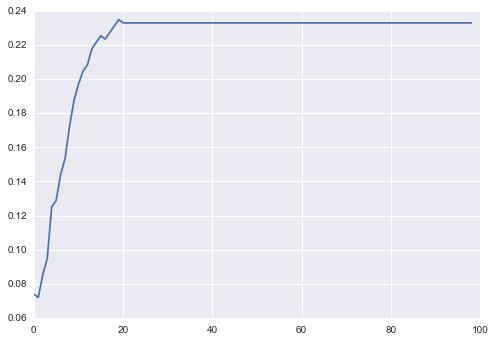

In [52]:
plt.plot(scores)

In [53]:
print scores[:10]

[0.073863636363636367, 0.071969696969696975, 0.085227272727272721, 0.094696969696969696, 0.125, 0.12878787878787878, 0.14393939393939395, 0.15340909090909091, 0.17234848484848486, 0.1875]


In [54]:
knn_model=KNeighborsClassifier(n_neighbors=20) 
knn_model.fit(X2_train,y_train)
knn_model.score(X2_test,y_test)

0.23484848484848486

In [84]:
knn_model=KNeighborsClassifier(n_neighbors=20) 
knn_model.fit(X5_train,y_train)
knn_model.score(X5_test,y_test)

0.22537878787878787

Yeah, this isn't the best model either. 

### Decision Tree

non-parametric hierarchical; nodes represent questions (“test conditions”) and edges are answers to these questions (edges lead from parent node to child node starting from root node and ending in leaf nodes = class labels) → binary yes/no answers; gild (grow) a decision tree = Hunt’s algorithm (greedy recursive algorithm →goal highest possible purity: Entropy (information gain) coefficient, Gini coefficient, Misclassification Error)

#### Single Forest

In [55]:
dtc_model = DecisionTreeClassifier()

In [56]:
dtc_model.fit(X1_train,y_train)
dtc_model.score(X1_test,y_test)

0.098484848484848481

Wow, totally overfitted model. 

In [59]:
cross_val_score(dtc_model, X1_train,y_train).mean()

0.0961961857275455

In [60]:
dtc_model.fit(X2_train,y_train)
dtc_model.score(X2_test,y_test)

0.094696969696969696

In [61]:
cross_val_score(dtc_model, X2_train,y_train).mean()

0.11151760767990955

In [62]:
dtc_model.fit(X3_train,y_train)
dtc_model.score(X3_test,y_test)

0.070075757575757569

In [63]:
cross_val_score(dtc_model, X3_train,y_train).mean()

0.10287756626483502

In [64]:
dtc_model.fit(X4_train,y_train)
dtc_model.score(X4_test,y_test)

0.094696969696969696

In [65]:
cross_val_score(dtc_model, X4_train,y_train).mean()

0.12749231235204767

Hm, alright; it seems like none of them are good; SMILE.

#### Random Forest

In [66]:
rfc_model=RandomForestClassifier()

In [67]:
rfc_model.fit(X1_train,y_train)
rfc_model.score(X1_test,y_test)

0.13825757575757575

In [68]:
cross_val_score(rfc_model, X1_train,y_train).mean()

0.18036792928584847

In [69]:
rfc_model.fit(X2_train,y_train)
rfc_model.score(X2_test,y_test)

0.1553030303030303

In [70]:
cross_val_score(rfc_model, X2_train,y_train).mean()

0.16450899719422638

In [71]:
rfc_model.fit(X3_train,y_train)
rfc_model.score(X3_test,y_test)

0.14015151515151514

In [72]:
cross_val_score(rfc_model, X3_train,y_train).mean()

0.17000969781663977

In [73]:
rfc_model.fit(X4_train,y_train)
rfc_model.score(X4_test,y_test)

0.14962121212121213

In [74]:
cross_val_score(rfc_model, X3_train,y_train).mean()

0.16062856537066886

In [85]:
rfc_model.fit(X5_train,y_train)
rfc_model.score(X5_test,y_test)

0.13257575757575757

In [86]:
cross_val_score(rfc_model, X5_train,y_train).mean()

0.16766789024028472

These are incredibly bad ...

#### Boosting

Boosting (convert weak learners to strong learners) - classifier for classification and regressor for regression

##### Ada Boost

In [75]:
ada_boost_model = AdaBoostClassifier(n_estimators=10)
cross_val_score(ada_boost_model, X1_train,y_train).mean()

0.32664363340484809

In [76]:
cross_val_score(ada_boost_model, X2_train,y_train).mean()

0.32491651768809504

In [77]:
cross_val_score(ada_boost_model, X3_train,y_train).mean()

0.32790149504006821

In [78]:
cross_val_score(ada_boost_model, X4_train,y_train).mean()

0.32790149504006821

##### Gradient Boosting

In [79]:
gbc_model = GradientBoostingClassifier(n_estimators=10)
cross_val_score(gbc_model, X1_train,y_train).mean()

0.032675537259631272

In [ ]:
cross_val_score(gbc_model, X2_train,y_train).mean()

In [ ]:
cross_val_score(gbc_model, X3_train,y_train).mean()

In [ ]:
cross_val_score(gbc_model, X4_train,y_train).mean()

Let's try to optimize this poor model

In [87]:
%time
scores = []
for n in [1, 2, 3, 5, 10, 20, 50, 100, 200, 300]:
    for criterion in ['gini', 'entropy']:
        start_time = time.time()  # let's time it, to see how long running a forest takes
        r_model = RandomForestClassifier(n_estimators=n, criterion=criterion)
        accuracy = cross_val_score(r_model, X3_train,y_train).mean()  # out of sample accuracy
        duration = time.time() - start_time
        scores.append(dict(n_estimators=n, criterion=criterion, accuracy=accuracy, duration=duration))
scores = pd.DataFrame(scores)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [88]:
scores

,accuracy,criterion,duration,n_estimators
0,0.083637,gini,0.149723,1
1,0.076375,entropy,0.158701,1
2,0.088009,gini,0.174316,2
3,0.068115,entropy,0.209379,2
4,0.095847,gini,0.234830,3
5,0.108977,entropy,0.321468,3
6,0.144562,gini,0.354369,5
7,0.114532,entropy,0.448854,5
8,0.161480,gini,0.597718,10
9,0.145815,entropy,0.751638,10


In [ ]:
models = [
    ('Random Forest Classifier',RandomForestClassifier(n_estimators=300))
    ,('Gradient Boosting Classifier',GradientBoostingClassifier(n_estimators=300))
    ,('Decision Tree Classifier',DecisionTreeClassifier())
    ,('Ada Boost Classfier',AdaBoostClassifier())
]
results = {}
for model, clf in models:
    score = cross_val_score(clf, X3_train,y_train).mean()
    results[model] = score

In [ ]:
results

### SVM (Support Vector Machine)

decision boundary that makes the most sense based on analytic geometry; generalization error = margin (area around line without points) → margin depends only on subset of training data nearest to line → create line with largest margin (maximum margin hyperplane) → convex objective function - take derivative and equal to zero to find max

In [89]:
from sklearn import svm
svm_model = svm.SVC()

In [90]:
svm_model.fit(X1_train,y_train)
svm_model.score(X1_test,y_test)

0.23295454545454544

In [91]:
cross_val_score(svm_model, X1_train,y_train).mean()

0.32790149504006821

In [96]:
svm_model.fit(X2_train,y_train)
cross_val_score(svm_model, X2_train,y_train).mean()

0.32790149504006821

In [93]:
cross_val_score(svm_model, X3_train,y_train).mean()

0.32790149504006821

In [94]:
cross_val_score(svm_model, X4_train,y_train).mean()

0.32790149504006821

## Categorical Feature - Genre

Alright, the other models failed, let's try to add genre into the mix.

In [ ]:
data.info()

In [112]:
y, X = dmatrices('song_hotness ~ artist_familiarty + artist_hotness + log_play_count_sum', data=data, return_type='dataframe')

In [100]:
for n in xrange(-3, 5):
    alpha = 10 ** n
    print "alpha %10.4f  OLS %.4f Lasso %.4f Ridge %.4f" % \
        (alpha, 
         -cross_val_score(LinearRegression(), X, y, cv=10, scoring='mean_absolute_error').mean(),
         -cross_val_score(Lasso(alpha), X, y, cv=10, scoring='mean_absolute_error').mean(), 
         -cross_val_score(Ridge(alpha), X, y, cv=10, scoring='mean_absolute_error').mean())

alpha     0.0010  OLS 0.0910 Lasso 0.0912 Ridge 0.0910
alpha     0.0100  OLS 0.0910 Lasso 0.0958 Ridge 0.0910
alpha     0.1000  OLS 0.0910 Lasso 0.1010 Ridge 0.0910
alpha     1.0000  OLS 0.0910 Lasso 0.1119 Ridge 0.0910
alpha    10.0000  OLS 0.0910 Lasso 0.1119 Ridge 0.0913
alpha   100.0000  OLS 0.0910 Lasso 0.1119 Ridge 0.0938
alpha  1000.0000  OLS 0.0910 Lasso 0.1119 Ridge 0.0955
alpha 10000.0000  OLS 0.0910 Lasso 0.1119 Ridge 0.0998


In [104]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.3411228619231772

In [105]:
cross_val_score(lr, X, y).mean()

0.33697018595728806

While it is not great, it is better then what he have gotten so far.

In [106]:
y, X = dmatrices('song_hotness ~ artist_familiarty + artist_hotness + genre_id', data=data, return_type='dataframe')

In [107]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.27140121382742377

In [108]:
cross_val_score(lr, X, y).mean()

-8.522415797318901e+21

In [109]:
y, X = dmatrices('song_hotness ~ artist_familiarty + artist_hotness + genre_id + log_play_count_sum', data=data, return_type='dataframe')

In [110]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.37142041316000396

In [111]:
cross_val_score(lr, X, y).mean()

-4.3298781184021029e+21

Genre did not really help much, but hello close to 40% ... definitely following a trial and error approach here

In [113]:
for k in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
    print lr.fit(X_train, y_train).score(X_test, y_test).round(3)

0.318
0.391
0.313
0.333
0.384
0.392
0.345
0.361
0.256
0.3


I should probably be concerned about the very negative numbers ... 

New motto:
"I have not failed. I've just found 10,000 ways that won't work." Thomas A. Edison

In [114]:
y, X = dmatrices('song_hotness ~ artist_familiarty + artist_hotness + genre_id + log_play_count_sum + bars_number', data=data, return_type='dataframe')

In [115]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.37178314522570199

In [116]:
for k in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
    print lr.fit(X_train, y_train).score(X_test, y_test).round(3)

0.319
0.384
0.339
0.346
0.384
0.358
0.368
0.381
0.343
0.333


In [117]:
y, X = dmatrices('song_hotness ~ artist_familiarty + genre_id + artist_hotness + song_modes + song_time_signatures + log_play_count_sum', data=data, return_type='dataframe')

In [118]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.37215371698224342

In [119]:
for k in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
    print lr.fit(X_train, y_train).score(X_test, y_test).round(3)

0.29
0.377
-1.41944142967e+21
0.323
0.379
0.33
0.363
0.299
-7.16088694186e+22
0.399


I want to cry! There is one 40%

Other option to include genre_id

```python
from sklearn.feature_extraction import DictVectorizer
categorical_feature = data[['genre_id']]
dv = DictVectorizer()
cat_matrix = dv.fit_transform(categorical_features.T.to_dict().values())
```

In [120]:
model = sm.ols(formula="song_hotness ~ artist_familiarty + genre_id + artist_hotness + song_modes + song_time_signatures + log_play_count_sum", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           song_hotness   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     42.85
Date:                Mon, 30 May 2016   Prob (F-statistic):          4.76e-156
Time:                        21:17:13   Log-Likelihood:                 1343.9
No. Observations:                1760   AIC:                            -2638.
Df Residuals:                    1735   BIC:                            -2501.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      0.2397      0.115      2.092      0.037         0.015     0.464
genre_id[T.Blues]             -0.0322      0.115     -0.280      0.780        -0.258     0.194
genre_id[T.Children]          -0.0722      0.123     -0.587      0.557        -0.313     0.169
genre_id[T.Classical]         -0.1045      0.139     -0.751      0.453        -0.378     0.168
genre_id[T.Comedy_Spoken]     -0.0365      0.117     -0.312      0.755        -0.266     0.193
genre_id[T.Country]           -0.0502      0.115     -0.438      0.662        -0.275     0.175
genre_id[T.Easy_Listening]    -0.1135      0.131     -0.864      0.387        -0.371     0.144
genre_id[T.Electronic]         0.0015      0.114      0.013      0.990        -0.223     0.226
genre_id[T.Folk]              -0.0152      0.118     -0.129      0.898        -0.246     0.216
genre_id[T.International]     -0.0217      0.115     -0.189      0.851        -0.247     0.204
genre_id[T.Jazz]              -0.0100      0.115     -0.087      0.931        -0.235     0.215
genre_id[T.Latin]             -0.0592      0.114     -0.517      0.605        -0.283     0.165
genre_id[T.New Age]           -0.0754      0.116     -0.649      0.517        -0.303     0.153
genre_id[T.Pop_Rock]           0.0043      0.114      0.038      0.970        -0.219     0.228
genre_id[T.Rap]               -0.0324      0.114     -0.283      0.777        -0.257     0.192
genre_id[T.Reggae]            -0.0557      0.115     -0.484      0.629        -0.281     0.170
genre_id[T.Religious]         -0.0648      0.115     -0.566      0.571        -0.289     0.160
genre_id[T.RnB]               -0.0224      0.115     -0.194      0.846        -0.248     0.203
genre_id[T.Stage ]            -0.0655      0.120     -0.546      0.585        -0.301     0.170
genre_id[T.Vocal]             -0.0307      0.123     -0.249      0.803        -0.272     0.211
artist_familiarty              0.2174      0.037      5.915      0.000         0.145     0.289
artist_hotness                 0.0756      0.041      1.836      0.067        -0.005     0.156
song_modes                     0.0069      0.006      1.169      0.243        -0.005     0.018
song_time_signatures           0.0020      0.002      0.852      0.394        -0.003     0.007
log_play_count_sum             0.0248      0.001     16.583      0.000         0.022     0.028
==============================================================================
Omnibus:                       30.154   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.259
Skew:                          -0.321   Prob(JB):                     1.63e-07
Kurtosis:                       3.117   Cond. No.                     1.09e+03
============================

I did some research to see, what the average R-squared is for predicting music taste. I found that mood is a very good predictor; would have needed the k-means on the lyrics for that - damn you expired Echonest API!

https://books.google.com/books?id=_zc3vKDLUNIC&pg=PA157&lpg=PA157&dq=R-squared+for+predicting+music&source=bl&ots=dUoTzH54JJ&sig=N01LAbXRoaAP4Bwp9_Kyr-UE6rA&hl=en&sa=X&ved=0ahUKEwj99N6E8YDNAhWCox4KHdmxBIwQ6AEIPjAE#v=onepage&q=R-squared%20for%20predicting%20music&f=false

Let's use some seaborn, just because we can. Generally, when you are lost, use some seaborn ... 

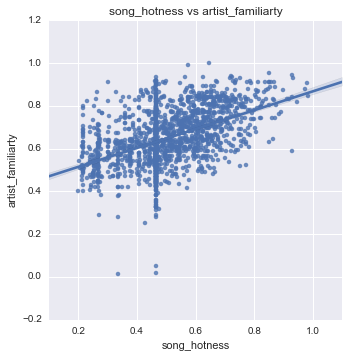

In [121]:
f = sb.lmplot(x = 'song_hotness', y='artist_familiarty', data=data, ci=95)
f = plt.title("song_hotness vs artist_familiarty")

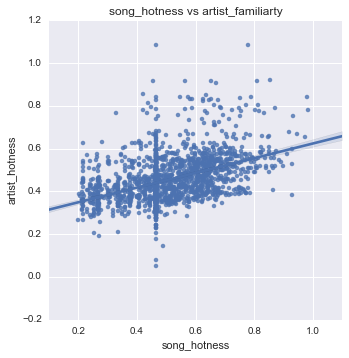

In [122]:
f = sb.lmplot(x = 'song_hotness', y='artist_hotness', data=data, ci=95)
f = plt.title("song_hotness vs artist_familiarty")

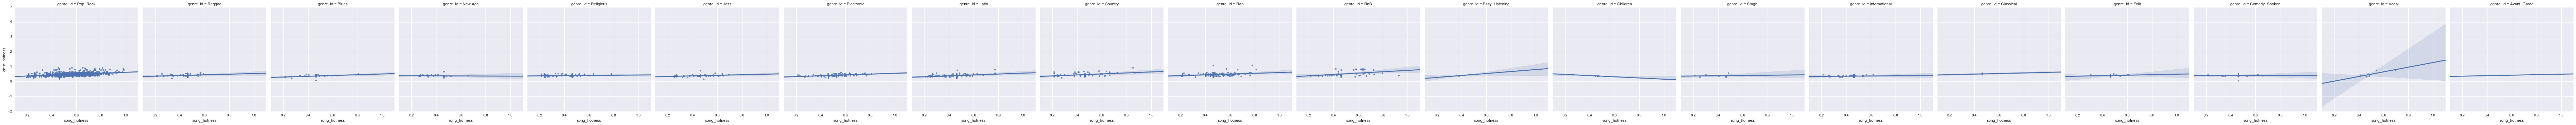

In [123]:
f = sb.lmplot(x = 'song_hotness', y='artist_hotness', col='genre_id', data=data)

might be my favorite graph! (*wink)

### Regularization

The moment has come ... reguralization

In [ ]:
degree = 4
modelchen = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression()).fit(X, y)

In [ ]:
modelchen.score(X, y)

In [ ]:
cross_val_score(modelchen, X,y).mean()

"modelchen" is a sweeter version of model in German

In [ ]:
for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
    # Compute a few R2 scores and print average performance
    scores = []
    for _ in xrange(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print "For degree", degree, ", R2 =", np.mean(scores)

"You'll need regularization when your model is complex, which happens when you have little data or many features."
- little data: CHECK
- many features: CHECK  
conclusion: complex model, we need regularization  
At least no worrying about overfitting. 

In [ ]:
degree =5
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1,4,5,6]:
    for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):
        model = make_pipeline(PolynomialFeatures(degree), my_model)    
        r2, MSE = [], []
        for k in xrange(100):  # Fit a few times the model to different training sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)
            r2.append(model.fit(X_train, y_train).score(X_test, y_test))
            MSE.append(np.square(y_pred_sample - y_small_sample).sum())

##### Lasso

Lasso regression imposes an L1 prior on the coefficient, causing many coeffiecients to be zero.

In [124]:
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1,4,5,6]:
    model = Lasso(alpha=alpha)
    scores = []
    for _ in xrange(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print "For alpha", alpha, ", R2 =", np.mean(scores)

For alpha 0.1 , R2 = 0.160097451275
For alpha 0.2 , R2 = -0.00257603675913
For alpha 0.3 , R2 = -0.00326446023806
For alpha 0.4 , R2 = -0.00601877110201
For alpha 0.5 , R2 = -0.00237555287477
For alpha 0.7 , R2 = -0.00199072664182
For alpha 1 , R2 = -0.00166646472096
For alpha 4 , R2 = -0.00365227966809
For alpha 5 , R2 = -0.00164749090108
For alpha 6 , R2 = -0.00218138785261


In [125]:
lasso = Lasso (alpha = 0.1)

In [127]:
print -cross_val_score(lasso, X, y, cv=10, scoring="mean_absolute_error").mean()
print -np.median(cross_val_score(lasso, X, y, cv=10, scoring="median_absolute_error"))

0.101017678418
0.0805986333183


##### RIdge

Ridge regression imposes an L2 prior on the coefficient, causing outliers to be less likely, and coeffiecients to be small across the board.

In [131]:
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1,4,5,6,7,8,9,10]:
    model = Ridge(alpha=alpha)
    scores = []
    for _ in xrange(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print "For alpha", alpha, ", R2 =", np.mean(scores)

For alpha 0.1 , R2 = 0.342215115275
For alpha 0.2 , R2 = 0.355449815433
For alpha 0.3 , R2 = 0.339669866033
For alpha 0.4 , R2 = 0.343295650517
For alpha 0.5 , R2 = 0.355257195747
For alpha 0.7 , R2 = 0.347254715972
For alpha 1 , R2 = 0.352489442264
For alpha 4 , R2 = 0.347380326745
For alpha 5 , R2 = 0.336565085543
For alpha 6 , R2 = 0.34551744957
For alpha 7 , R2 = 0.337605300918
For alpha 8 , R2 = 0.349492462187
For alpha 9 , R2 = 0.348184253729
For alpha 10 , R2 = 0.357285724009


In [132]:
ridge = Ridge (alpha= 0.5)

In [133]:
print -cross_val_score(ridge, X, y, cv=10, scoring="mean_absolute_error").mean()
print -np.median(cross_val_score(ridge, X, y, cv=10, scoring="median_absolute_error"))

0.0896892467543
0.0708311514759


## k-means clustering

Maybe we use the k-means clustering unsupervised machine learning model to create additional features?

In [ ]:
from sklearn.feature_extraction import DictVectorizer

categorical_features = data[['genre_id']]
dv = DictVectorizer()
cat_matrix = dv.fit_transform(categorical_features.T.to_dict().values())

In [ ]:
categorical_features.head()

In [ ]:
data.info()

In [ ]:
from scipy.sparse import hstack
other_features = data[['artist_familiarty','artist_hotness','song_modes','song_time_signatures','log_play_count_sum',\
                       'song_durations','song_tempo','beats_number','song_release_years']]

In [ ]:
other_features.head()

In [ ]:
data_matrix = hstack([cat_matrix, other_features])
data_matrix

In [ ]:
from sklearn.preprocessing import scale

data_matrix = scale(data_matrix.todense())

In [ ]:
from sklearn.cluster import KMeans

clustering_model = KMeans(n_clusters = 25)
clustering_model.fit(data_matrix)

clusters = clustering_model.predict(data_matrix)

clusters

In [ ]:
pd.Series(clusters).value_counts()

In [ ]:
data['genre_id'].value_counts()

In [ ]:
results = pd.DataFrame({ 'cluster' : clusters, 'genre_id' : data['genre_id']})
cluster_counts = results.groupby('cluster')['genre_id'].value_counts()

In [ ]:
results

In [ ]:
cluster_counts

In [ ]:
for i in xrange(len(cluster_counts)):
    print "Cluster " ,i
    print cluster_counts[i]
    print

Let's accept, we should just use the unsupervised learning models.